In [1]:
%load_ext autoreload
%autoreload 2

import __init__
from __init__ import *
import pandas as pd
import glob
import os
from typing import List

In [2]:
dirr = '/Users/jh/Desktop/projects/rust-proj/simulation_dirs/market_sim1/data/'
# sub = 'adapt v1'

In [3]:
frs = load(dirr)
frs.keys()

dir: /Users/jh/Desktop/projects/rust-proj/simulation_dirs/market_sim1/data/adapt v2


dict_keys(['price', 'agent_info', 'tasks', 'deaths', 'trades', 'utility'])

Index(['tick', 'good', 'new_price', 'old_price', 'unexecuted', 'volume',
       'exec'],
      dtype='object')


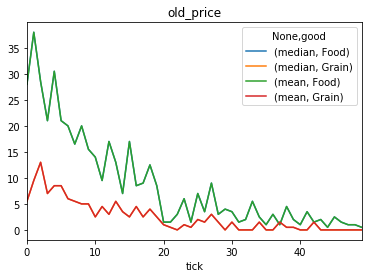

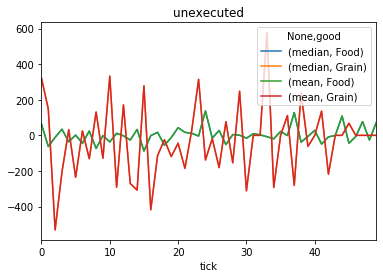

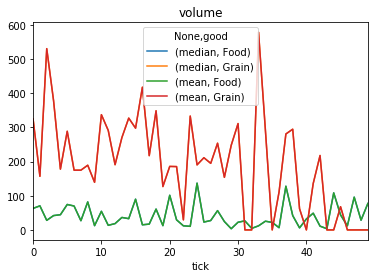

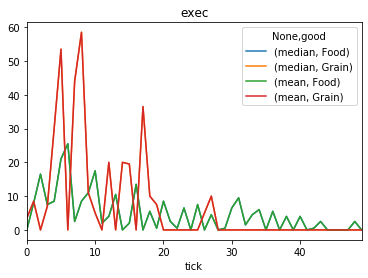

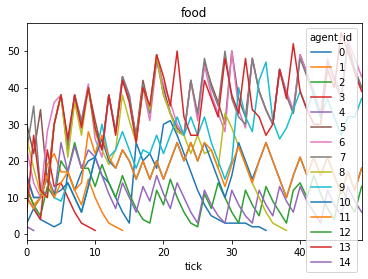

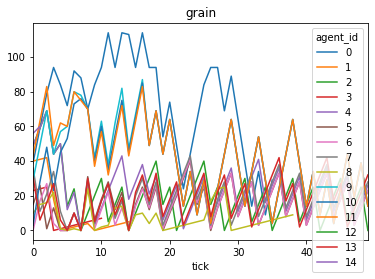

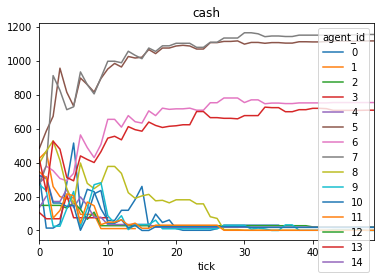

In [4]:
price = frs['price']
price['exec'] = price['volume'] - price['unexecuted'].abs()
plot_price(price, 'old_price', 'unexecuted', 'volume', 'exec')



plot_agent(frs['agent_info'], 'food', 'grain')
plot_agent(frs['agent_info'], 'cash',)


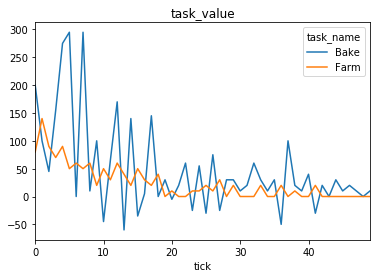

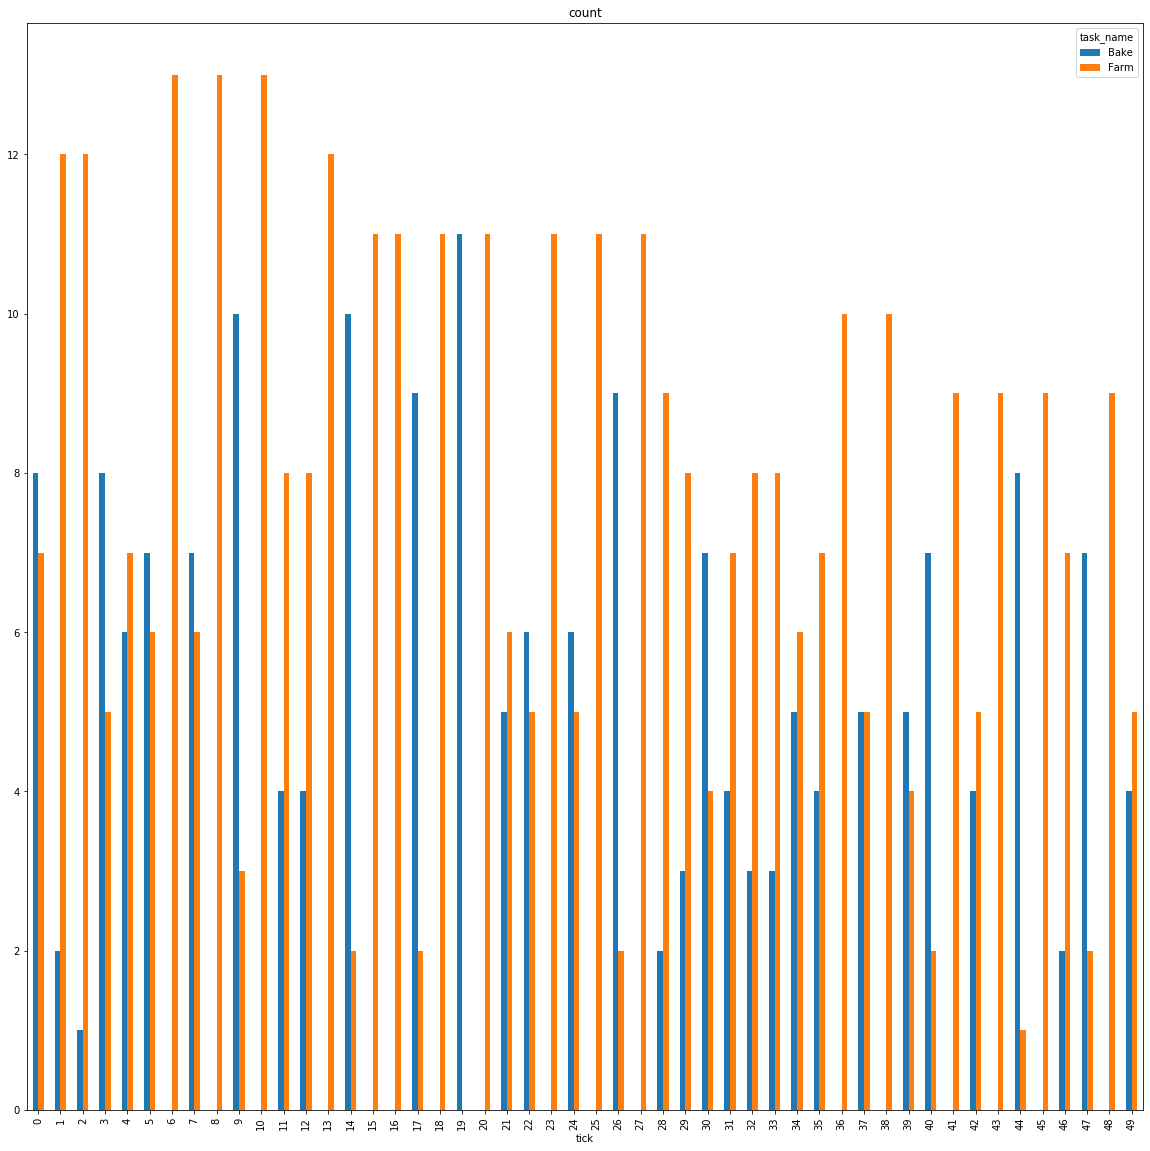

,tick,task_name,task_value,revenue,cost,agent_id
2,0,Bake,200,400,200,2
5,0,Bake,200,400,200,4
8,0,Bake,600,800,200,8
11,0,Farm,160,160,0,0
14,0,Bake,200,400,200,10
17,0,Farm,160,160,0,11
20,0,Farm,160,160,0,12
23,0,Bake,600,800,200,7
26,0,Bake,600,800,200,6
29,0,Bake,600,800,200,5


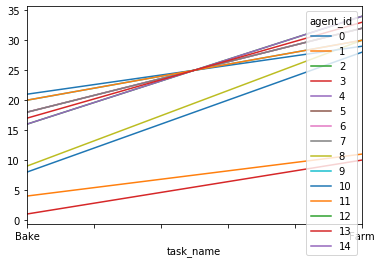

In [20]:
tasks = frs['tasks']
# plot_tasks(frs['tasks'], 'task_value', 'revenue', 'cost')
plot_tasks(frs['tasks'], 'task_value')
performed = tasks.loc[tasks['agent_id'] != -1]
performed.groupby(['tick', 'task_name']).count().unstack()['task_value'].plot(kind='bar',title='count', figsize=(20,20))
plt.show()
performed.groupby(['task_name','agent_id']).count().unstack()['task_value'].plot()
performed.iloc[0:20]


In [6]:
deaths = frs['deaths']
# deaths.groupby(['tick']).count().unstack().plot()
deaths

,tick,agent_id
0,1,12
1,2,14
2,11,3
3,15,1
4,36,0
5,39,8


In [7]:
trades = frs['trades']
trades.keys()

Index(['tick', 'good', 'price', 'supply', 'to_trade', 'agent_id'], dtype='object')

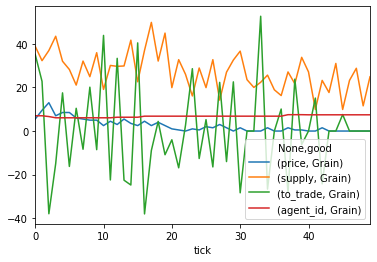

In [8]:
grouped = trades[trades['good'] == 'Grain'].groupby(["tick", "good"]).mean().unstack().plot()

In [21]:
utility = frs['utility']
# utility.set_index(['tick', 'agent_id']).unstack()['food_consumed'].plot(kind='density')
# utility.groupby(['agent_id']).aggregate(['min', 'max', 'median']).unstack()['food_consumed'].plot()
utility.iloc[200:500:6]

,tick,agent_id,utility,food_consumed
200,15,0,414,3
206,15,9,414,5
212,16,0,414,5
218,16,9,414,5
224,17,10,414,5
230,17,13,414,5
236,18,11,414,5
242,19,2,293,1
248,19,7,414,5
254,20,4,414,5
